In [139]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [141]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [142]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [143]:
x=df.drop(columns=['Survived'])

In [144]:
y=df['Survived']

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [146]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [147]:
x_train.head()


,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [148]:
x_test.head()

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0


In [149]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\tomar\AppData\Local\Temp\ipykernel_1168\2031519514.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
C:\U

In [150]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,28.5
493,71.0,49.5042,71.0
527,NaN,221.7792,17.0


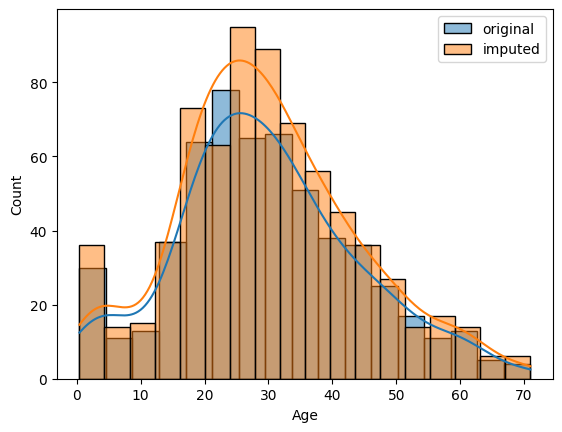

In [151]:
sns.histplot(x_train['Age'], kde=True, label='original')
sns.histplot(x_train['Age_imputed'], kde=True, label='imputed')
plt.legend()
plt.show()

In [152]:
print('original variable variance: ', x_train['Age'].var())
print('variance after random imputation: ', x_train['Age_imputed'].var())

original variable variance:  204.34951339046142
variance after random imputation:  204.4255535161744


In [153]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,44.791733
Age,71.512440,204.349513,204.349513
Age_imputed,44.791733,204.349513,204.425554


<Axes: >

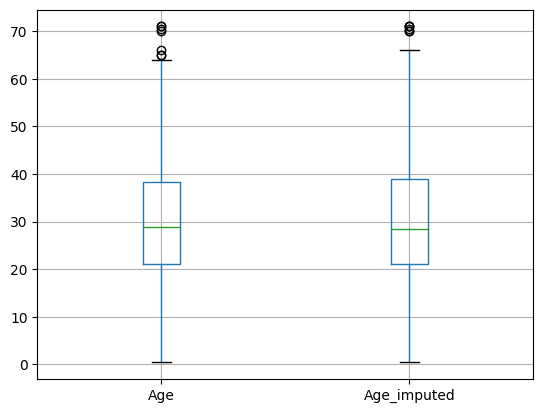

In [154]:
x_train[['Age','Age_imputed']].boxplot()

In [155]:
# sampled_value=x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

In [156]:
data=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [157]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [158]:
x=data
y=data['SalePrice']

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [160]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_test['GarageQual_imputed']=x_test['GarageQual']

x_train['FireplaceQu_imputed']=x_train['FireplaceQu']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']

In [161]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
730,TA,TA,236500,TA,TA
75,NaN,TA,91000,TA,NaN
13,Gd,TA,279500,TA,Gd
520,NaN,NaN,106250,NaN,NaN
537,NaN,TA,111250,TA,NaN


In [162]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()]=x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()]=x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()]=x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

C:\Users\tomar\AppData\Local\Temp\ipykernel_1168\3674334412.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual']

In [163]:
temp=pd.concat(
   [ x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['GarageQual_imputed'].value_counts()/len(x_train)
   ],axis=1
)
temp.columns=['original','imputed']

In [164]:
temp

,original,imputed
TA,0.951043,0.948630
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.001712
Ex,0.000907,0.001712


In [165]:
temp=pd.concat(
   [ x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts()/len(x_train)
   ],axis=1
)
temp.columns=['original','imputed']

In [166]:
temp

,original,imputed
Gd,0.494272,0.493151
TA,0.412439,0.412671
Fa,0.040917,0.041952
Po,0.027823,0.028253
Ex,0.024550,0.023973


C:\Users\tomar\AppData\Local\Temp\ipykernel_1168\2729153118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
C:\Users\tomar\AppData\Local\Temp\ipykernel_1168\2729153118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

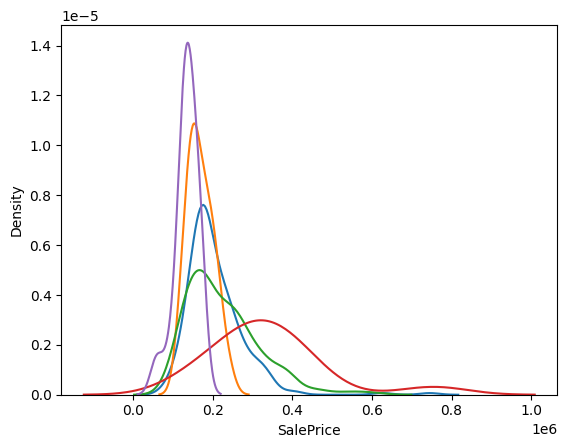

In [167]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\tomar\AppData\Local\Temp\ipykernel_1168\3731921799.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
C:\Users\tomar\AppData\Local\Temp\ipykernel_1168\3731921799.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

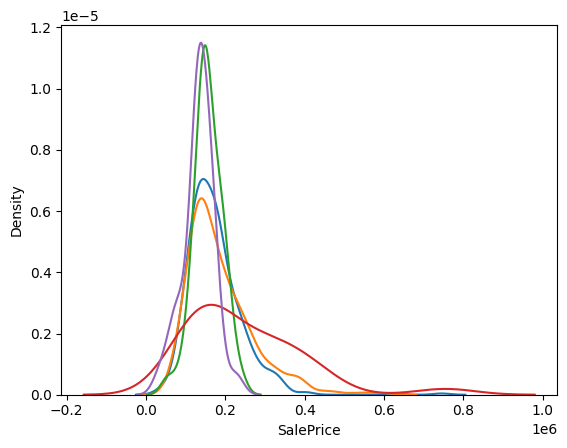

In [168]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.show()

In [169]:
from sklearn.impute import SimpleImputer,MissingIndicator

In [170]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [171]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [172]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [174]:
x_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [175]:
si=SimpleImputer()
x_train_trf=si.fit_transform(x_train)
x_test_trf=si.transform(x_test)

In [176]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
clf.fit(x_train_trf,y_train)
y_pred=clf.predict(x_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [177]:
mi=MissingIndicator()
mi.fit(x_train)

MissingIndicator()

In [178]:
mi.features_

array([0])

In [179]:
x_train_missing=mi.transform(x_train)
x_test_missing=mi.transform(x_test)

In [180]:
x_train['Age_NA']=x_train_missing

In [181]:
x_test['Age_NA']=x_test_missing

In [182]:
x_train

,Age,Fare,Age_NA
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [183]:
x_test

,Age,Fare,Age_NA
707,42.0,26.2875,False
37,21.0,8.0500,False
615,24.0,65.0000,False
169,28.0,56.4958,False
68,17.0,7.9250,False
...,...,...,...
89,24.0,8.0500,False
80,22.0,9.0000,False
846,NaN,69.5500,True
870,26.0,7.8958,False


In [184]:
si=SimpleImputer()
x_train_trf2=si.fit_transform(x_train)
x_test_trf2=si.transform(x_test)

In [185]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
clf.fit(x_train_trf2,y_train)

y_pred=clf.predict(x_test_trf2)

accuracy_score(y_test,y_pred)

0.6312849162011173

In [186]:
si=SimpleImputer(add_indicator=True)

In [187]:
x_train=si.fit_transform(x_train)

In [188]:
x_test=si.transform(x_test)

In [189]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
clf.fit(x_train_trf2,y_train)

y_pred=clf.predict(x_test_trf2)

accuracy_score(y_test,y_pred)



0.6312849162011173